In [2]:
from backend.data_model.time_series import DataMultibandTimeSeries
from backend.data_model.data_model_interface import DataModelInterface, load_config
from backend.online.online_algorithms import OurMethod
from backend.online.online_interface import OnlineInterface
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_time_series(time_series, color='blue'):
    time_series.fold()
    if 'B' in time_series:
        plt.plot(time_series['B'].phase, time_series['B'].values, '*', color='blue')
    if 'R' in time_series:
        plt.plot(time_series['R'].phase, time_series['R'].values, '*', color='red')
    plt.show()
    
def plot_original_time_series(time_series, color='blue'):
    if 'B' in time_series:
        plt.plot(time_series['B'].times, time_series['B'].values, '*', color='blue')
    if 'R' in time_series:
        plt.plot(time_series['R'].times, time_series['R'].values, '*', color='red')
    plt.show()

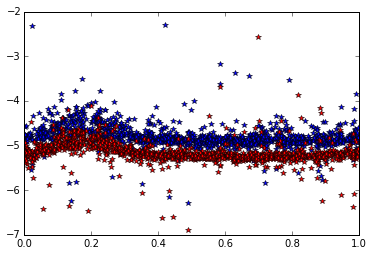

In [3]:
config = load_config('/home/lucas/PycharmProjects/lightcurves-backend/backend/config.json')
data_model_interface = DataModelInterface(config)
online_interface = OnlineInterface(data_model_interface)
ceph = 'macho.1.3447.36'
rrl = 'macho.1.3442.1051'
eb = 'macho.1.3807.1436'
ts_target = data_model_interface.get_time_series_database().get_one('macho', eb)
plot_time_series(ts_target)

0


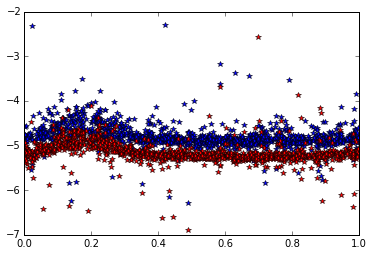

1


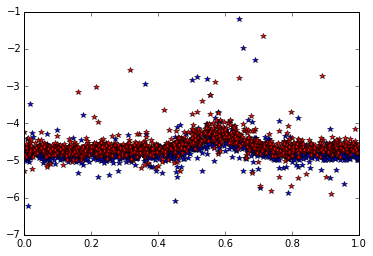

2


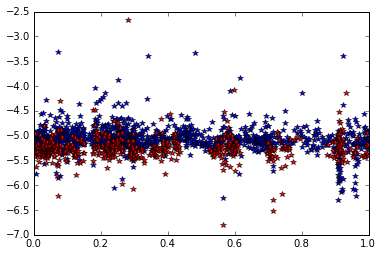

3


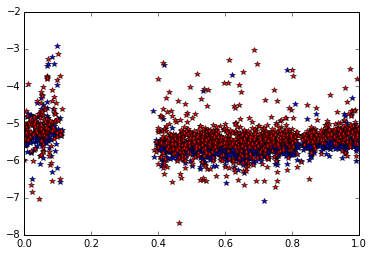

4


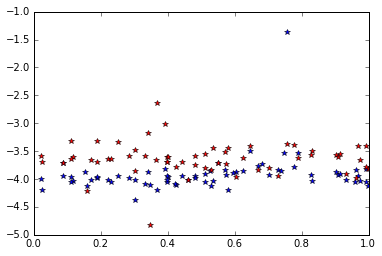

5


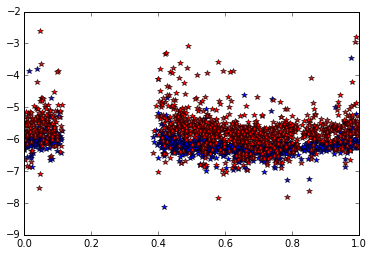

6


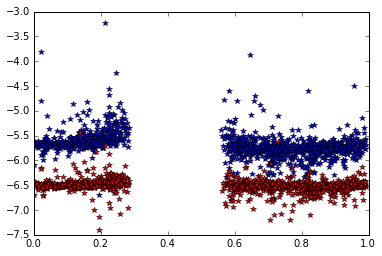

7


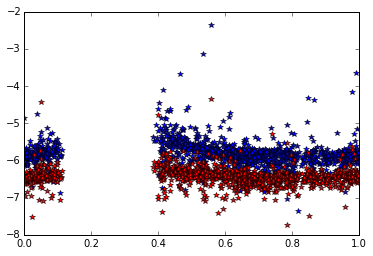

8


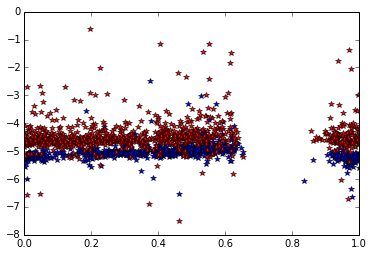

9


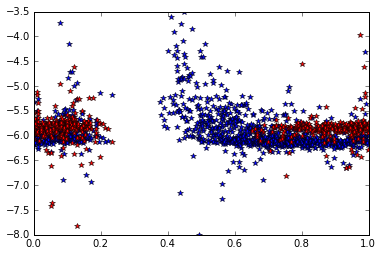

In [4]:
time_series_ranking, distances = online_interface.feature_space_query(ts_target.feature_dict, 10)
i = 0
for ts, distance in zip(time_series_ranking, distances):
    print i
    plot_time_series(ts)
    i += 1

0


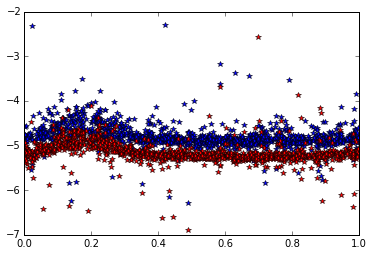

{u'PercentAmplitude': -0.27475708083522843, u'MaxSlope': 80.37664784928856, u'Eta_color': 1609.107906570141, u'Meanvariance': -0.046257348204652673, u'Rcs': 0.05361638995842863, u'FluxPercentileRatioMid65': 0.4567164179104479, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.10000000000000027, u'Freq2_harmonics_rel_phase_3': -0.5791560972259909, u'Freq2_harmonics_rel_phase_2': 0.2511559258142121, u'Freq2_harmonics_rel_phase_1': 0.5902437528309821, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1909.6512371931078, u'FluxPercentileRatioMid35': 0.18358208955223915, u'Q31': 0.19074999999999956, u'Con': 0.0, u'Std': 0.22229976026178916, u'MedianBRP': 0.837979094076655, u'Freq3_harmonics_rel_phase_2': 0.6735541149210275, u'Freq3_harmonics_rel_phase_3': -1.054128574690558, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.5311672370169027, u'Amplitude': 0.4500000000000002, u'CAR_mean': -515.0898612393427, u'Period_fit': 2.0946829594077773e-44, u'Psi_CS': 0.1816954

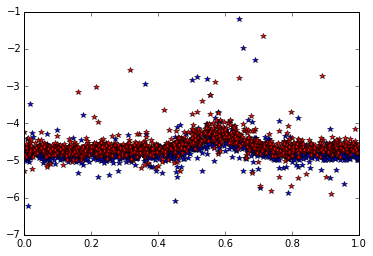

{u'PercentAmplitude': -0.2689626469670168, u'MaxSlope': 50.08278143257261, u'Eta_color': 2616.995255737657, u'Meanvariance': -0.04274808311097758, u'Rcs': 0.05047900311453516, u'FluxPercentileRatioMid65': 0.4523026315789467, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.0986842105263152, u'Freq2_harmonics_rel_phase_3': 0.8852635007670044, u'Freq2_harmonics_rel_phase_2': 0.8133890531272487, u'Freq2_harmonics_rel_phase_1': 0.5863103059296875, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1711.4024431839628, u'FluxPercentileRatioMid35': 0.18914473684210573, u'Q31': 0.1775000000000002, u'Con': 0.0008741258741258741, u'Std': 0.20397591034731585, u'MedianBRP': 0.8184991273996509, u'Freq3_harmonics_rel_phase_2': -0.2859801715757432, u'Freq3_harmonics_rel_phase_3': 0.07099650881196456, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': 0.4971183967042746, u'Amplitude': 0.4162499999999998, u'CAR_mean': -3.0424434768816035, u'Period_fit': 2.0279471824112787e-46, u'Ps

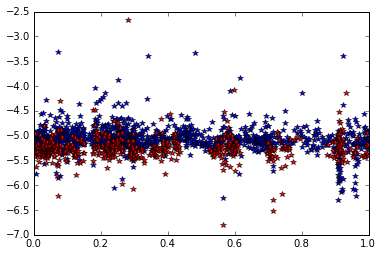

{u'PercentAmplitude': -0.23927587563951205, u'MaxSlope': 65.5549765783156, u'Eta_color': 5963.378559321767, u'Meanvariance': -0.0431167447462932, u'Rcs': 0.10399865395775636, u'FluxPercentileRatioMid65': 0.44321766561514253, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.11671924290220788, u'Freq2_harmonics_rel_phase_3': 2.615519241463048, u'Freq2_harmonics_rel_phase_2': 0.08146848670472773, u'Freq2_harmonics_rel_phase_1': -0.04475099445349251, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1448.5396916667905, u'FluxPercentileRatioMid35': 0.20977917981072544, u'Q31': 0.19874999999999954, u'Con': 0.008503401360544218, u'Std': 0.21934593422296192, u'MedianBRP': 0.8123938879456706, u'Freq3_harmonics_rel_phase_2': -2.851489258022831, u'Freq3_harmonics_rel_phase_3': -0.9304805342100904, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.4427079227691573, u'Amplitude': 0.4929999999999999, u'CAR_mean': -0.9353877875102636, u'Period_fit': 7.394692103652246e-07, u'

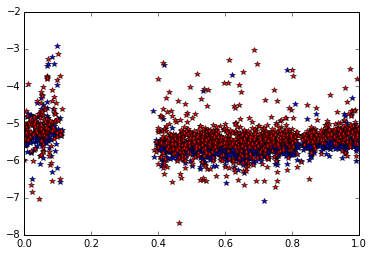

{u'PercentAmplitude': -0.26042961121959873, u'MaxSlope': 35.867358491648346, u'Eta_color': 2188.710545256495, u'Meanvariance': -0.03860394151932538, u'Rcs': 0.07442024606606537, u'FluxPercentileRatioMid65': 0.4229137199434223, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.10042432814710006, u'Freq2_harmonics_rel_phase_3': -1.1720661290938186, u'Freq2_harmonics_rel_phase_2': -1.4837274981469608, u'Freq2_harmonics_rel_phase_1': 0.7619813251457088, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 833.0872415701415, u'FluxPercentileRatioMid35': 0.17963224893917934, u'Q31': 0.19150000000000045, u'Con': 0.0, u'Std': 0.21733928406682854, u'MedianBRP': 0.8310749774164409, u'Freq3_harmonics_rel_phase_2': -0.23505605708373745, u'Freq3_harmonics_rel_phase_3': -2.0421524233870705, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -2.347693963628543, u'Amplitude': 0.43000000000000016, u'CAR_mean': -0.3773891217496516, u'Period_fit': 2.4823278201783046e-55, u'Psi_CS': 0.12

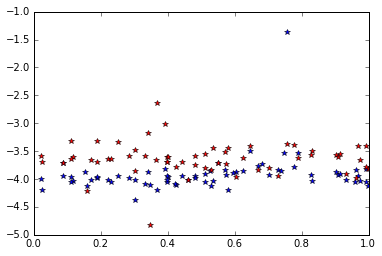

{u'PercentAmplitude': -0.1144517433046994, u'MaxSlope': 18.672423096478187, u'Eta_color': 25683.907673102167, u'Meanvariance': -0.03862800707412317, u'Rcs': 0.14632441789937245, u'FluxPercentileRatioMid65': 0.3807106598984775, u'AndersonDarling': 0.9939118256123686, u'FluxPercentileRatioMid20': 0.11844331641285935, u'Freq2_harmonics_rel_phase_3': 1.1421100464561942, u'Freq2_harmonics_rel_phase_2': 0.4000195605016797, u'Freq2_harmonics_rel_phase_1': -0.030547412234180005, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 295099.18887868966, u'FluxPercentileRatioMid35': 0.2013536379018617, u'Q31': 0.17599999999999927, u'Con': 0.0, u'Std': 0.15265730741951572, u'MedianBRP': 0.4776119402985074, u'Freq3_harmonics_rel_phase_2': -0.17141021803793222, u'Freq3_harmonics_rel_phase_3': -0.4296693178056911, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.4477660587532051, u'Amplitude': 0.3294999999999999, u'CAR_mean': -4.5236953740686126, u'Period_fit': 0.722849404638678, u'Ps

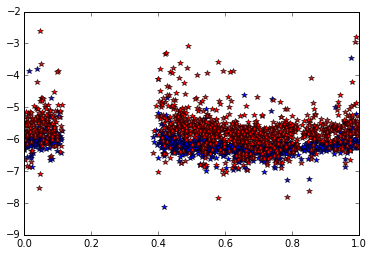

{u'PercentAmplitude': -0.19913350449293976, u'MaxSlope': 66.28444982919885, u'Eta_color': 1022.2850566036443, u'Meanvariance': -0.03624154340451954, u'Rcs': 0.09361089580076948, u'FluxPercentileRatioMid65': 0.4216216216216212, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.08918918918918907, u'Freq2_harmonics_rel_phase_3': -1.0465508196989637, u'Freq2_harmonics_rel_phase_2': 1.0871713445888151, u'Freq2_harmonics_rel_phase_1': 0.4674636814065413, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1127.2326633628807, u'FluxPercentileRatioMid35': 0.17432432432432388, u'Q31': 0.20399999999999974, u'Con': 0.0, u'Std': 0.2253827246947445, u'MedianBRP': 0.7760551248923342, u'Freq3_harmonics_rel_phase_2': 0.8545646182693449, u'Freq3_harmonics_rel_phase_3': 1.5017601578699722, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.7838196245376446, u'Amplitude': 0.4664999999999999, u'CAR_mean': -0.2644167526714612, u'Period_fit': 2.0788792672834557e-35, u'Psi_CS': 0.119289

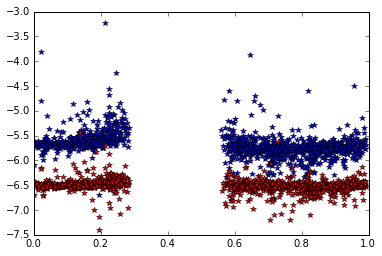

{u'PercentAmplitude': -0.18628051448070693, u'MaxSlope': 46.86888455626197, u'Eta_color': 1324.3289700987675, u'Meanvariance': -0.037906208538836215, u'Rcs': 0.08142292972414898, u'FluxPercentileRatioMid65': 0.4178674351585015, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.09221902017291077, u'Freq2_harmonics_rel_phase_3': -1.0522453931578288, u'Freq2_harmonics_rel_phase_2': -1.8632680351845603, u'Freq2_harmonics_rel_phase_1': 0.7286362428750719, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 876.7316920823578, u'Freq2_harmonics_amplitude_0': 0.0700307321239363, u'Q31': 0.18774999999999945, u'Con': 0.0, u'Std': 0.2166264268358752, u'MedianBRP': 0.7720970537261699, u'Freq3_harmonics_rel_phase_2': -0.5113265285624501, u'Freq3_harmonics_rel_phase_3': 0.6506783431563363, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.4626264208011627, u'Amplitude': 0.4757500000000001, u'CAR_mean': -0.31363578928623764, u'Period_fit': 2.4795926954621546e-47, u'Psi_CS': 0.1

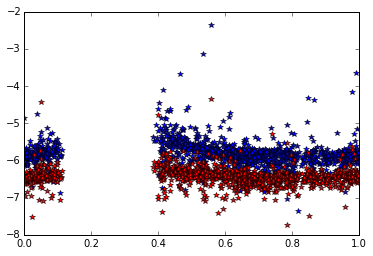

{u'PercentAmplitude': -0.2609366958311889, u'MaxSlope': 73.97363466541836, u'Eta_color': 1024.118560476539, u'Meanvariance': -0.04828368192870116, u'Rcs': 0.051486180781322284, u'FluxPercentileRatioMid65': 0.4288816503800215, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.1020629750271448, u'Freq2_harmonics_rel_phase_3': 1.4268892293808135, u'Freq2_harmonics_rel_phase_2': -0.4937733624083944, u'Freq2_harmonics_rel_phase_1': 0.6068345762030888, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1442.446688589436, u'FluxPercentileRatioMid35': 0.17915309446254088, u'Q31': 0.2629999999999999, u'Con': 0.001755926251097454, u'Std': 0.2814394459993141, u'MedianBRP': 0.782646801051709, u'Freq3_harmonics_rel_phase_2': -2.3251012065706678, u'Freq3_harmonics_rel_phase_3': -2.7351323249262256, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -1.5771299258067606, u'Amplitude': 0.5932499999999998, u'CAR_mean': -5.742453015261527, u'Period_fit': 6.836340652084128e-28, u'Psi_C

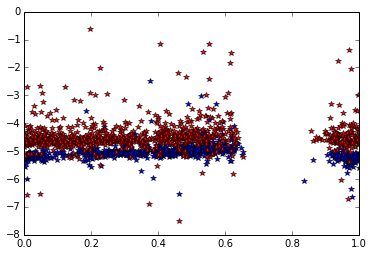

{u'PercentAmplitude': -0.2571880248987256, u'MaxSlope': 87.60884123090106, u'Eta_color': 8049.606981698384, u'Meanvariance': -0.03835263681768041, u'Rcs': 0.08819916363069127, u'FluxPercentileRatioMid65': 0.4145161290322589, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.10645161290322552, u'Freq2_harmonics_rel_phase_3': -0.1743969913563371, u'Freq2_harmonics_rel_phase_2': -1.259807824196835, u'Freq2_harmonics_rel_phase_1': 0.9596333946088512, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 9885.494051411675, u'FluxPercentileRatioMid35': 0.17741935483871016, u'Q31': 0.17525000000000102, u'Con': 0.0, u'Std': 0.19383886250957874, u'MedianBRP': 0.8489010989010989, u'Freq3_harmonics_rel_phase_2': 0.04687618239674274, u'Freq3_harmonics_rel_phase_3': 1.3384765651628132, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': 2.187456498420909, u'Amplitude': 0.3860000000000001, u'CAR_mean': -518.42136857321, u'Period_fit': 2.490277414349513e-35, u'Psi_CS': 0.1300460380518

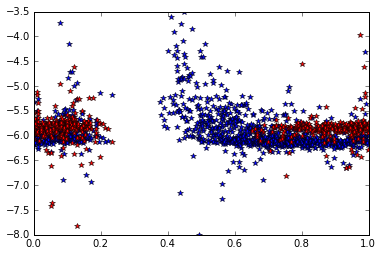

{u'PercentAmplitude': -0.2114370468029004, u'MaxSlope': 61.93737766804214, u'Eta_color': 9551.16890204231, u'Meanvariance': -0.045270261770490684, u'Rcs': 0.10088905611526426, u'FluxPercentileRatioMid65': 0.4898734177215184, u'AndersonDarling': 1.0, u'FluxPercentileRatioMid20': 0.0911392405063292, u'Freq2_harmonics_rel_phase_3': 0.5260524432096223, u'Freq2_harmonics_rel_phase_2': -0.5831189089641465, u'Freq2_harmonics_rel_phase_1': 0.508581972220002, u'Freq2_harmonics_rel_phase_0': 0.0, u'Eta_e': 1078.138050181929, u'FluxPercentileRatioMid35': 0.17848101265822786, u'Q31': 0.2502499999999994, u'Con': 0.004578754578754579, u'Std': 0.2708617419697175, u'MedianBRP': 0.7659963436928702, u'Freq3_harmonics_rel_phase_2': -0.10991899429746944, u'Freq3_harmonics_rel_phase_3': 0.17889626739257447, u'Freq3_harmonics_rel_phase_0': 0.0, u'Freq3_harmonics_rel_phase_1': -0.9769653209460414, u'Amplitude': 0.5335000000000001, u'CAR_mean': -0.046232711742442534, u'Period_fit': 2.6406794693243616e-34, u'P

In [5]:
time_series_ranking, distances = online_interface.feature_space_query(ts_target.feature_dict, 10)
i = 0
for ts, distance in zip(time_series_ranking, distances):
    print i
    plot_time_series(ts)
    print ts.feature_dict
    i += 1

In [26]:
a = np.arange(10).astype(np.float32)

In [27]:
np.mod(a,2)

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.], dtype=float32)